# $\textbf{Progetto finale abilità informatiche}$

### packages and params

In [1]:
from astropy.io import fits 
import tools 
import numpy as np
import matplotlib.pyplot as plt

In [2]:

params = [
    [{'sigma':0.02, 'h':25,'rho':1.0},
    {'sigma':0.02, 'h':50,'rho':1.0},
    {'sigma':0.02, 'h':75,'rho':1.0}],
    
    [{'sigma':0.02, 'h':50,'rho':1.0},
    {'sigma':0.001, 'h':50,'rho':1.0},
    {'sigma':0.005, 'h':50,'rho':1.0}],
    
    {'sigma':0.001, 'h':5,'rho':1.0},
    [{'sigma':0.02, 'h':5,'rho':1.0},
    {'sigma':0.005, 'h':5,'rho':1.0}]
    ]

## Frist implementation : 
$\textit{Covariance, correlation and data validation for one pole }$

### read data from file

For zero pole (X01) from test 1 data, we read measure matrix (200xn_mis) and distance array (200)

In [3]:
n_mis = 10000
measures,distance = tools.Read(N_mis = n_mis,test = 1,keyword = 'XI0')

Reading: 100%|██████████| 10000/10000 [02:18<00:00, 72.27it/s]


### Numerical calculation of Covariance and Correlation

Calcolation of Covariance Matrix $(C)$ using the measures matrix $(D)$.


\begin{equation*}
    C = \frac{1}{N_{mis}-1} (D-\langle D \rangle )(D-\langle D \rangle )^T
\end{equation*}

From C we define the Correlation Matrix as 


\begin{equation*}
    R_{ij} = \frac{C_{ij}}{\sqrt{C_{ii}C_{jj}}}
\end{equation*}


Check between numpy covariance function and homemade function  

In [4]:

COV = np.cov(measures.T)
MYCOV = tools.Covariance(measures)
CORR = tools.Correlation(COV)

epsilon = 1e-15
MAX_DIFF = np.max(np.abs(COV-MYCOV))
if MAX_DIFF < epsilon:
    print(f'correct check ==> maximum difference value : {MAX_DIFF}')
else:
    print(f'WARNING: max difference {MAX_DIFF} > {epsilon}')


correct check ==> maximum difference value : 5.421010862427522e-20


### Print plot

print covaraince matrix $(C)$ and Correlation matrix $(R)$


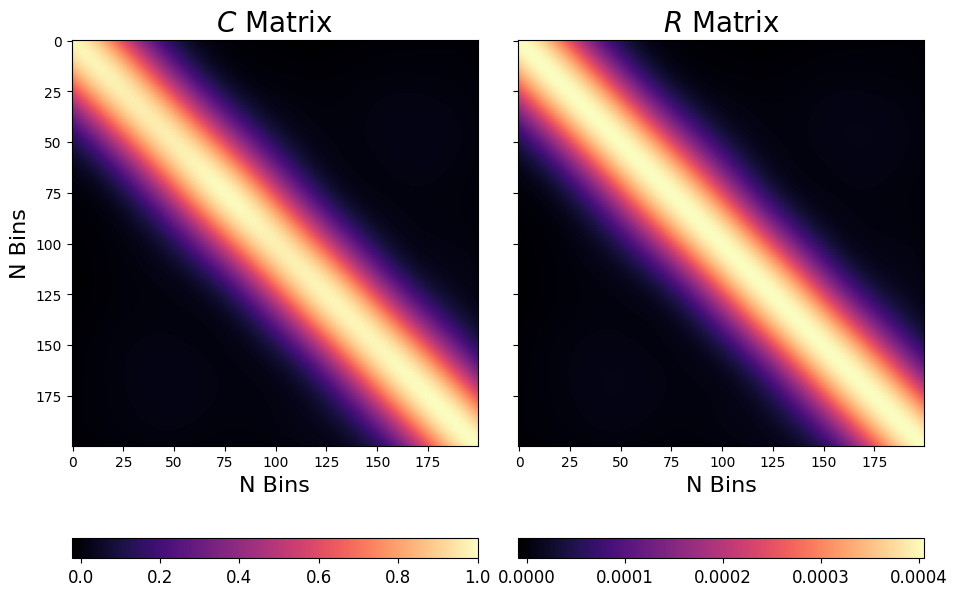

In [5]:
tools.plot_figures(COV,CORR,title_1 = '$C$ Matrix',title_2='$R$ Matrix',size = (11,8))

# Theorical Covariance and Correlation

We want to validate the covarance of ours data. So, to do this, we calculate theorical covariance matrix, using the $\textit{Cholesky}$ decomposition method. This method allows us to create a Gaussian distributed covariance matrix of a generated data set. 
$\\$
So, we expect the measured covariance to have a distribution consistent with the theoretical one created, i.e


\begin{equation*}
    C^{th}[D_l(r_i),D_k(r_j)] = \sigma_l \sigma_k \sqrt{\frac{2 h_l h_k}{h^2_l+h_k^2}} \exp{\left(-\frac{(r_i-r_j)^2}{h^2_l+h_k^2}\right)}
\end{equation*}


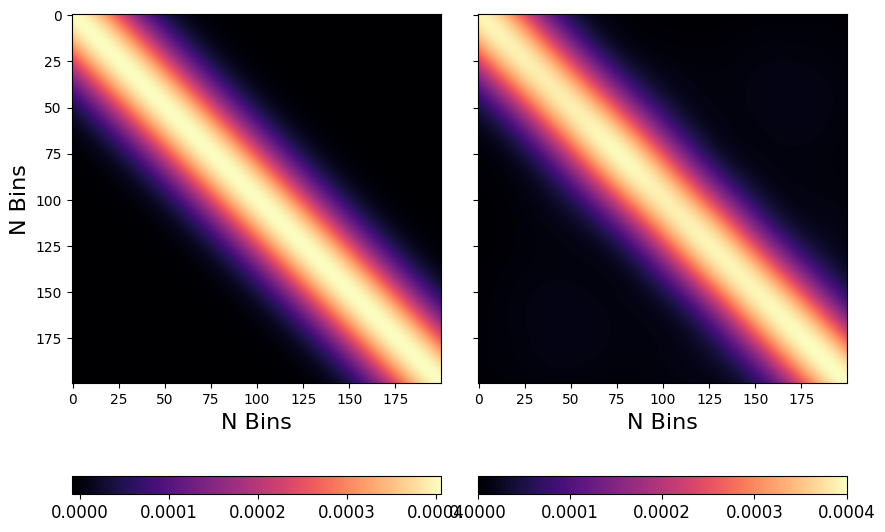

In [10]:
TH_COV = tools.Th_Covariance(distance,[0,0],params[0])
RES = tools.Res(TH_COV,COV,n_mis)
tools.plot_figures(TH_COV,COV,size = (10,8))

### Validation between Theoretical and Measure Covariance matrix

The residues matrix define as

\begin{equation*}
    Res_{ij} = (C_{ij}^{th}-C_{ij}) \sqrt{\frac{N_{mis}-1}{(1+R_{ij})C_{ii}^{th}C_{ii}^{th}}}
\end{equation*}


Must have a normal distribution with standard deviation $\text{\textasciitilde}$ 1

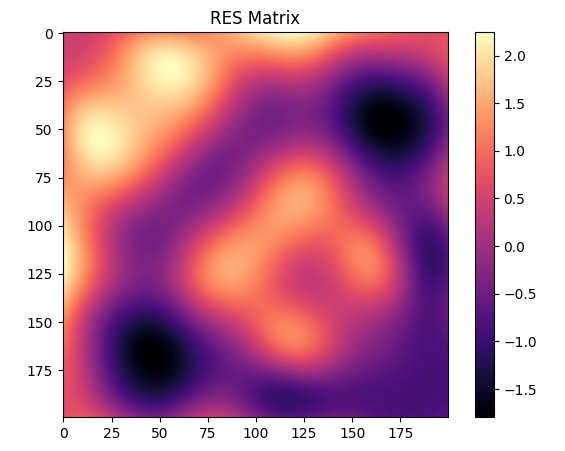

standard dev = 0.9471380341783253


In [11]:

tools.plot_figure(RES,title = 'RES Matrix')
print(f'standard dev = {np.std(RES.reshape(200*200))}')

# Cross-Covariance between different multipoles

In [12]:
N_mis = 10000 
TEST_NUMBER = 1

##############################################
keyword_list = ['XI0','XI2','XI4']
data_distance = []
data_mesures = []
for dipoles in keyword_list:
    print(f'read dipole = > {dipoles}')
    temp0,temp1 = tools.Read(N_mis = N_mis,test = TEST_NUMBER,keyword = dipoles)
    data_distance.append(temp1)
    data_mesures.append(temp0)
    del temp0
    del temp1

read dipole = > XI0


Reading: 100%|██████████| 10000/10000 [01:43<00:00, 96.17it/s]


read dipole = > XI2


Reading: 100%|██████████| 10000/10000 [01:40<00:00, 99.44it/s]


read dipole = > XI4


Reading: 100%|██████████| 10000/10000 [01:40<00:00, 99.28it/s]


In [13]:
COVARIANCE = []
CORRELATION = []
for i in range(len(data_mesures)):
    COVARIANCE.append(tools.Covariance(data_mesures[i]))
    CORRELATION.append(tools.Correlation(COVARIANCE[i]))
    

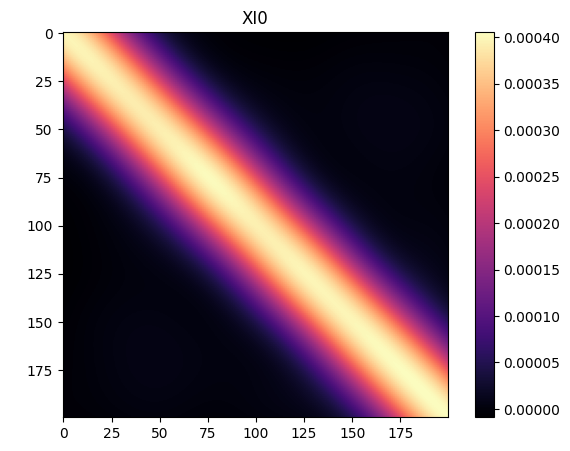

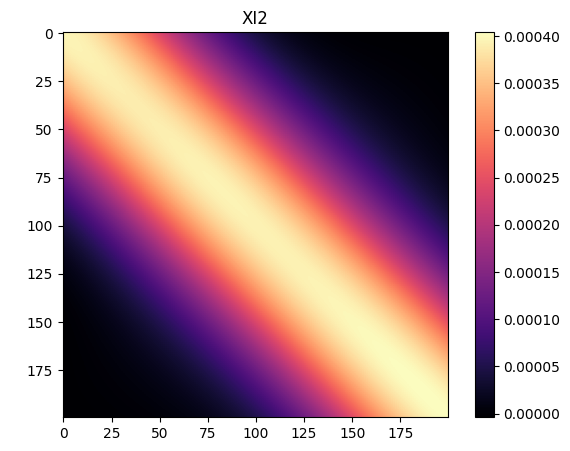

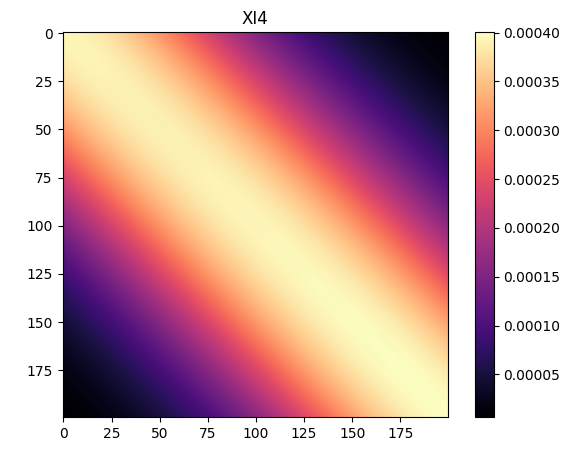

In [14]:
for i in range(len(data_mesures)):
    tools.plot_figure(COVARIANCE[i],title=keyword_list[i])  

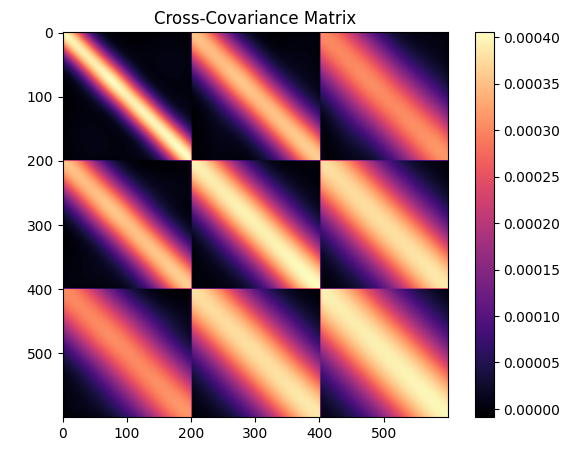

In [15]:
TOT_COVARIANCE = tools.Cross_covariance(data_mesures)
BLOCK_COVARIANCE = tools.block_matrix(TOT_COVARIANCE)
tools.plot_figure(BLOCK_COVARIANCE,title='Cross-Covariance Matrix')


## Theoretical Cross-Correlation

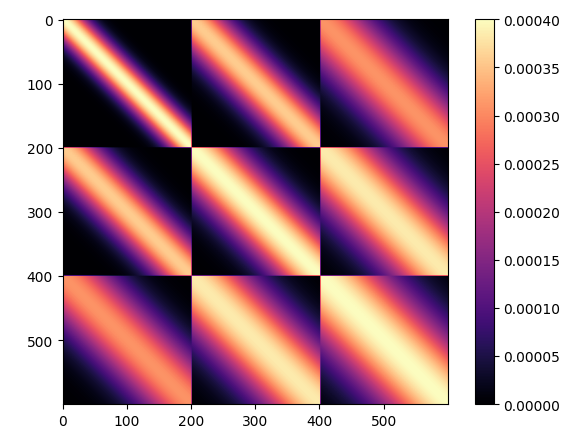

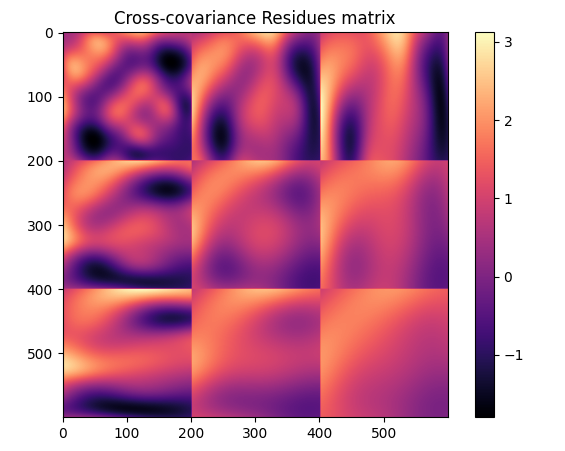

standard dev = 0.9114166373941788


In [19]:
test = TEST_NUMBER-1
TH_CROSS_COV = tools.Th_Cross_Covariance(data_distance,params[test])
BLOCK_CROSS_COVARIANCE = tools.block_matrix(TH_CROSS_COV)
tools.plot_figure(BLOCK_CROSS_COVARIANCE)
CROSS_RES = tools.Res_cross(TH_CROSS_COV,TOT_COVARIANCE,N_mis)
tools.plot_figure(tools.block_matrix(CROSS_RES),title='Cross-covariance Residues matrix')
print(f'standard dev = {np.std(CROSS_RES.reshape(600*600))}')